In [4]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [5]:
k = 2
a = np.sin(k)
b = np.cos(k)

In [6]:
A = -1
B = 1

In [7]:
def phi(i, x):
    if i < 1:
        return 0
    return np.power(x, i-1)*(1-x*x)

def ddphi(i, x):
    if i < 1:
        return 0
    elif i == 1:
        return -2
    elif i == 2:
        return -6*x
    return (i-1)*(i-2)*x**(i-3)-i*(i+1)*x**(i-1)

def q(x):
    return (1+b*x*x)

def f(x):
    return -1
    
def y(x):
    res = phi(0, x)
    for i in range(len(ais)):
        res += ais[i] * phi(i + 1, x)
    return res

# y(n, x) = phi(0, x) + a1*phi(1, x) + ... + an*phi(n, x)
# ddy(n, x) = ddphi(0, x) + a1*ddphi(1, x) + ... + an*ddphi(n, x)
# psi(x, a1, ..., an) = a*ddy(n, x) + q(x)*y(n, x) - f(x)

Коллокации:

In [8]:
def k(i, x):
    return a * ddphi(i, x) + q(x) * phi(i, x)

def c(x):
    return f(x) - a * ddphi(0, x) - q(x) * phi(0, x) 


In [9]:
ais = []

def gms(n):
    xs = [round(x, 3) for x in np.linspace(A, B, n + 1)]

    syst = []
    vec = []

    for x in xs:
        r = []
        for i in range(n + 1):
            r.append(k(i+1, x))
        syst.append(r)
        vec.append(c(x))

    ais = [round(a, 3) for a in np.linalg.solve(syst, vec)]
    ys = [round(y(x), 3) for x in xs]

    return xs, ys, ais

first 10 of ai coeffs:
 [0.964, 0.0, -0.116, 0.0, 0.02, -0.0, -0.001, 0.0, 0.0]

some points of grid func:
 [(-1.0, 0.0), (-0.938, 0.105), (-0.875, 0.208), (-0.812, 0.305), (-0.75, 0.396), (-0.688, 0.481), (-0.625, 0.562), (-0.562, 0.636), (-0.5, 0.702), (-0.438, 0.762)] ...
... [(0.438, 0.762), (0.5, 0.702), (0.562, 0.636), (0.625, 0.562), (0.688, 0.481), (0.75, 0.396), (0.812, 0.305), (0.875, 0.208), (0.938, 0.105), (1.0, 0.0)]


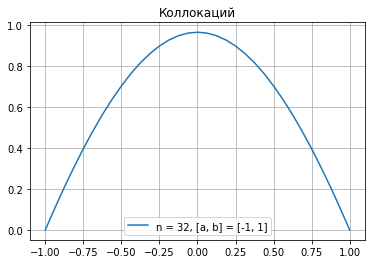

In [10]:
n = 8
xs, ys, ais = gms(n)
eps = 1e-3

found = False
while not found:
    n *= 2
    xs_p, ys_p, ais_p = gms(n)

    tmp = ys_p[::2]

    for i in range(len(ys) - 1):
        if abs(ys[i] - tmp[i]) > eps:
            found = False
            break
        found = True

    if n > 2000:
        break

    xs, ys = xs_p, ys_p

grid_func = list(zip(xs, ys))
print("first 10 of ai coeffs:\n", list(ais[:10]))
print()
print("some points of grid func:\n", grid_func[:10], "...\n...", grid_func[-10:] 
    if len(grid_func) > 10 
    else grid_func)

plt.plot(xs, ys, label=f"n = {n}, [a, b] = [{A}, {B}]")
plt.title("Коллокаций")
plt.legend()
plt.grid()
plt.show()

Галеркина:

In [11]:
def k(i, j):
    res = a * integrate.quad(lambda x: phi(i, x) * ddphi(j, x), A, B)[0] + \
            integrate.quad(lambda x: q(x) * phi(i, x) * phi(j, x), A, B)[0]
    return res

def c(i):
    res = -(integrate.quad(lambda x: phi(i, x) * ddphi(0, x), A, B)[0] + \
            integrate.quad(lambda x: q(x) * phi(i, x) * phi(0, x), A, B)[0] + \
            integrate.quad(lambda x: phi(i, x), A, B)[0])
    return res

In [12]:
def gms(n):
    xs = np.linspace(A, B, n+1)

    syst = []
    vec = []

    for i in range(1, n + 1):
        r = []
        for j in range(1, n + 1):
            r.append(k(i, j))
        syst.append(r)
        vec.append(c(i))

    ais = np.linalg.solve(syst, vec)

    ys = [y(x) for x in xs]

    return xs, ys, ais

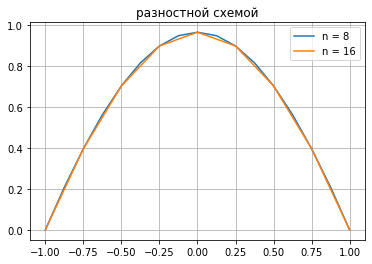

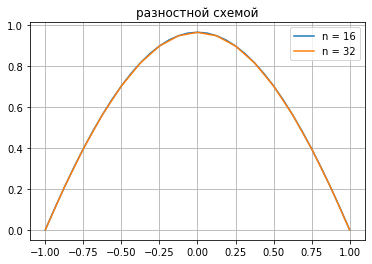

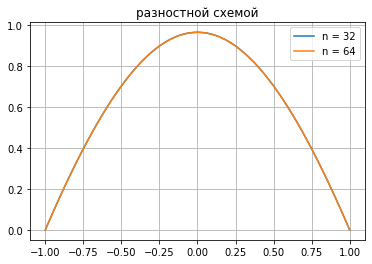

In [13]:
n = 8
xs_p, ys_p, ais_p = gms(n)
eps = 1e-3

found = False
while not found:
    n *= 2
    xs, ys, ais = gms(n)

    tmp = ys[::2]

    for i in range(len(ys) - 1):
        if abs(ys[i] - tmp[i]) > eps:
            found = False
            break
        found = True

    plt.plot(xs, ys, label=f"n = {n//2}")
    plt.plot(xs_p, ys_p, label=f"{n = }")
    plt.legend()
    plt.grid()
    plt.show()

    if n > 2000:
        break

    xs_p, ys_p = xs, ys


grid_func = list(zip(xs, ys))
print("first 10 of ai coeffs:\n", list(ais[:10]))
print()
print("some points of grid func:\n", grid_func[:10], "...\n...", grid_func[-10:] 
    if len(grid_func) > 10 
    else grid_func)

plt.plot(xs, ys, label=f"n = {n}, [a, b] = [{A}, {B}]")
plt.title("Галеркина")
plt.legend()
plt.grid()
plt.show()

Наименьших квадратов (дискретный):

In [ ]:
N = 2*n

xs = np.linspace(A, B, N)

In [ ]:
def k(i, j):
    res = 0
    for x in xs:
        res += (a * ddphi(i, x) + q(x)*phi(i, x)) * \
                (a * ddphi(j, x) + q(x) * phi(j, x))
    res *= 2 
    return res

def c(i):
    res = 0
    for x in xs:
        res += (a * ddphi(i, x) + q(x)*phi(i, x)) * \
                (a * ddphi(0, x) + q(x) * phi(0, x) + 1)
    res *= -2 
    return res

[(-1.0, 0.0), (-0.935483870967742, 0.10959631347419513), (-0.8709677419354839, 0.21429335002158004), (-0.8064516129032258, 0.31373960192671874), (-0.7419354838709677, 0.40755965344894274), (-0.6774193548387097, 0.4953634782276099), (-0.6129032258064516, 0.5767555519915978), (-0.5483870967741935, 0.6513436977334431), (-0.4838709677419355, 0.7187475703047643), (-0.4193548387096775, 0.7786066808381232)] ...
... [(0.4193548387096775, 0.7786066808381257), (0.4838709677419355, 0.7187475703047692), (0.5483870967741935, 0.6513436977334465), (0.6129032258064515, 0.5767555519915976), (0.6774193548387095, 0.4953634782276095), (0.7419354838709677, 0.4075596534489453), (0.8064516129032258, 0.3137396019267226), (0.8709677419354838, 0.21429335002158112), (0.935483870967742, 0.10959631347419774), (1.0, 0.0)]


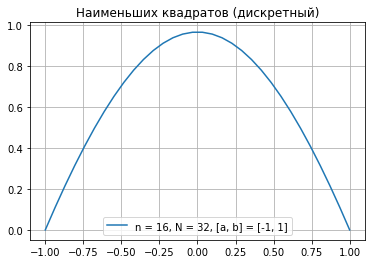

In [ ]:
syst = []
vec = []

for i in range(1, n + 1):
    r = []
    for j in range(1, n + 1):
        r.append(k(i, j))
    syst.append(r)
    vec.append(c(i))

ais = np.linalg.solve(syst, vec)

ys = [y(x) for x in xs]

grid_func = list(zip(xs, ys))
print(grid_func[:10], "...")
print("...", grid_func[-10:])

plt.plot(xs, ys, label=f"n = {n}, N = {N}, [a, b] = [{A}, {B}]")
plt.title("Наименьших квадратов (дискретный)")
plt.legend()
plt.grid()
plt.show()

Наименьших квадратов (интегральный):

In [ ]:
n = 100
xs = np.linspace(A, B, n)

In [ ]:
def k(i, j):
    res = integrate.quad(
        lambda x: \
            (ddphi(j, x) + q(x) * phi(j, x)) * \
            (ddphi(i, x) + q(x) * phi(i, x)),
        A, B)[0]
    return res

def c(i):
    res = integrate.quad(
        lambda x: f(x) * ( ddphi(i, x) + q(x)*phi(i, x)),
        A, B)[0]
    return res

[(-1.0, 0.0), (-0.9797979797979798, 0.029955278420674716), (-0.9595959595959596, 0.0594950693968311), (-0.9393939393939394, 0.08861173942249385), (-0.9191919191919192, 0.11729738347008169), (-0.898989898989899, 0.14554384746036694), (-0.8787878787878788, 0.17334275063381188), (-0.8585858585858586, 0.20068550787422884), (-0.8383838383838383, 0.22756335184739865), (-0.8181818181818181, 0.2539673550660083)] ...
... [(0.8181818181818183, 0.25396735506600804), (0.8383838383838385, 0.22756335184739845), (0.8585858585858588, 0.2006855078742285), (0.8787878787878789, 0.17334275063381172), (0.8989898989898992, 0.1455438474603666), (0.9191919191919193, 0.1172973834700815), (0.9393939393939394, 0.08861173942249385), (0.9595959595959598, 0.05949506939683075), (0.9797979797979799, 0.029955278420674563), (1.0, 0.0)]


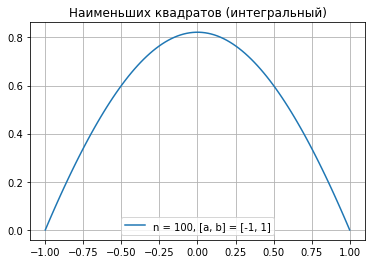

In [ ]:
syst = []
vec = []

for i in range(1, n+1):
    r = []
    for j in range(1, n+1):
        r.append(k(i, j))
    syst.append(r)
    vec.append(c(i))

ais = np.linalg.solve(syst, vec)

ys = [y(x) for x in xs]

grid_func = list(zip(xs, ys))
print(grid_func[:10], "...")
print("...", grid_func[-10:])

plt.plot(xs, ys, label=f"n = {n}, [a, b] = [{A}, {B}]")
plt.title("Наименьших квадратов (интегральный)")
plt.legend()
plt.grid()
plt.show()